In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 10000

In [2]:
df = pd.read_csv('data/fbl_1.csv')

In [3]:
df.head()

,element,round,assists,bonus,bps,clean_sheets,value,creativity,total_points,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,red_cards,saves,selected_by_percent,threat,transfers_balance,was_home,yellow_cards,label,player_name,web_name,element_type,player_team,understat_id,h_team,a_team,shots,xG,xA,key_passes,npg,npxG,xGChain,xGBuildup,xG_player_team,xGA_player_team,npxG_player_team,npxGA_player_team,deep_player_team,deep_allowed_player_team,scored_player_team,missed_player_team,npxGD_player_team,ppda_att_player_team,ppda_def_player_team,ppda_allowed_att_player_team,ppda_allowed_def_player_team,xG_opponent_team,xGA_opponent_team,npxG_opponent_team,npxGA_opponent_team,deep_opponent_team,deep_allowed_opponent_team,scored_opponent_team,missed_opponent_team,npxGD_opponent_team,ppda_att_opponent_team,ppda_def_opponent_team,ppda_allowed_att_opponent_team,ppda_allowed_def_opponent_team
0,454,1,0.10863,0.32589,17.788171,0.298733,5.5,0.0,3.611949,1.357876,0.054315,0.0,0.0,90.0,Chelsea,0.0,0.0,0.350575,0.0,0,0,0.027158,0,Aaron Cresswell,Cresswell,2,West Ham,534,Chelsea,West Ham,0.756757,0.029529,0.089044,1.081081,0.054054,0.029529,0.279442,0.184625,1.431594,1.459965,1.351471,1.299719,5.578947,6.842105,1.710526,1.342105,0.051752,222.868421,23.947368,214.447368,24.342105,1.433677,1.174375,1.333523,1.094252,9.315789,5.105263,1.552632,1.394737,0.239271,213.236842,25.0,272.026316,27.0
1,454,2,0.00000,0.00000,0.000000,0.000000,5.5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,Bournemouth,0.0,0.0,0.288275,0.0,-3002,1,0.000000,0,Aaron Cresswell,Cresswell,2,West Ham,534,West Ham,Bournemouth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.445604,1.460300,0.445604,0.699127,3.000000,7.000000,1.000000,2.000000,-0.253523,333.000000,28.000000,213.000000,34.000000,0.522847,1.911050,0.522847,1.911050,3.000000,4.000000,1.000000,3.000000,-1.388203,351.000000,24.0,263.000000,25.0
2,454,3,0.00000,0.00000,0.000000,0.000000,5.4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,Manchester City,0.0,0.0,0.239675,0.0,-2053,0,0.000000,0,Aaron Cresswell,Cresswell,2,West Ham,534,Manchester City,West Ham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.692880,0.393410,1.692880,0.393410,13.000000,7.000000,1.000000,0.000000,1.299470,253.000000,34.000000,172.000000,23.000000,2.171980,1.310660,1.410810,0.549491,9.000000,3.000000,4.000000,1.000000,0.861319,208.000000,44.0,253.000000,19.0
3,454,4,0.00000,0.00000,0.000000,0.000000,5.4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,Watford,0.0,0.0,0.210675,0.0,-1221,1,0.000000,0,Aaron Cresswell,Cresswell,2,West Ham,534,West Ham,Watford,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.083850,3.216240,1.083850,3.216240,0.000000,18.000000,1.000000,3.000000,-2.132390,354.000000,26.000000,146.000000,26.000000,1.077750,2.032710,1.077750,1.271540,8.000000,11.000000,1.000000,3.000000,-0.193790,286.000000,29.0,204.000000,29.0
4,454,5,0.00000,0.00000,0.000000,0.000000,5.4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,West Bromwich Albion,0.0,0.0,0.198325,0.0,-520,0,0.000000,0,Aaron Cresswell,Cresswell,2,West Ham,534,West Bromwich Albion,West Ham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.322160,1.854790,1.322160,1.854790,5.000000,6.000000,2.000000,4.000000,-0.532630,158.000000,29.000000,254.000000,21.000000,1.483470,0.986511,1.483470,0.986511,4.000000,8.000000,0.000000,1.000000,0.496959,224.000000,21.0,130.000000,19.0


In [4]:
df.shape

(71597, 64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71597 entries, 0 to 71596
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   element                         71597 non-null  int64  
 1   round                           71597 non-null  int64  
 2   assists                         71597 non-null  float64
 3   bonus                           71597 non-null  float64
 4   bps                             71597 non-null  float64
 5   clean_sheets                    71597 non-null  float64
 6   value                           71597 non-null  float64
 7   creativity                      71597 non-null  float64
 8   total_points                    71597 non-null  float64
 9   goals_conceded                  71597 non-null  float64
 10  goals_scored                    71597 non-null  float64
 11  ict_index                       71597 non-null  float64
 12  influence                       

In [6]:
columns_to_select = ['element', 'round', 'assists', 'bonus', 'clean_sheets', 'value', 'creativity', 'total_points',\
                     'goals_conceded', 'goals_scored', 'minutes', 'opponent_team', 'red_cards', 'yellow_cards', 'player_name', \
                    'player_team', 'scored_player_team', 'scored_opponent_team']

In [7]:
df = df[columns_to_select]

In [8]:
df.head()

,element,round,assists,bonus,clean_sheets,value,creativity,total_points,goals_conceded,goals_scored,minutes,opponent_team,red_cards,yellow_cards,player_name,player_team,scored_player_team,scored_opponent_team
0,454,1,0.10863,0.32589,0.298733,5.5,0.0,3.611949,1.357876,0.054315,90.0,Chelsea,0.0,0.027158,Aaron Cresswell,West Ham,1.710526,1.552632
1,454,2,0.00000,0.00000,0.000000,5.5,0.0,0.000000,0.000000,0.000000,0.0,Bournemouth,0.0,0.000000,Aaron Cresswell,West Ham,1.000000,1.000000
2,454,3,0.00000,0.00000,0.000000,5.4,0.0,0.000000,0.000000,0.000000,0.0,Manchester City,0.0,0.000000,Aaron Cresswell,West Ham,1.000000,4.000000
3,454,4,0.00000,0.00000,0.000000,5.4,0.0,0.000000,0.000000,0.000000,0.0,Watford,0.0,0.000000,Aaron Cresswell,West Ham,1.000000,1.000000
4,454,5,0.00000,0.00000,0.000000,5.4,0.0,0.000000,0.000000,0.000000,0.0,West Bromwich Albion,0.0,0.000000,Aaron Cresswell,West Ham,2.000000,0.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71597 entries, 0 to 71596
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   element               71597 non-null  int64  
 1   round                 71597 non-null  int64  
 2   assists               71597 non-null  float64
 3   bonus                 71597 non-null  float64
 4   clean_sheets          71597 non-null  float64
 5   value                 71597 non-null  float64
 6   creativity            71597 non-null  float64
 7   total_points          71597 non-null  float64
 8   goals_conceded        71597 non-null  float64
 9   goals_scored          71597 non-null  float64
 10  minutes               71597 non-null  float64
 11  opponent_team         71597 non-null  object 
 12  red_cards             71597 non-null  float64
 13  yellow_cards          71597 non-null  float64
 14  player_name           71597 non-null  object 
 15  player_team        

In [10]:
df['element'].unique()

array([454, 142,  16, 482, 163, 283,  30, 286, 205,  34, 164, 563, 627,
       261, 556, 450, 158, 187, 531, 593, 281, 192, 578, 220,  21,  18,
        12, 558, 644, 412, 262,  68, 638, 605, 152,  39, 120, 374, 468,
       178, 680, 361, 456, 267, 477, 250, 144, 505,  29,  70, 535, 641,
       359, 260,  74, 656, 224, 649, 119, 398, 386, 430, 278,  56, 418,
       603,  52, 496, 280, 343, 335, 507, 490, 197, 621,  76, 562,  49,
         9,  83, 328, 314,  33, 459, 438, 244, 213, 394, 168, 414, 117,
       541, 442, 122, 406, 408, 433, 440, 293, 302, 149, 301,  77, 254,
       657, 107,  43, 651, 182, 275, 179, 214, 383, 172,  26, 439, 451,
       540,  61, 570, 554, 161, 291,   1, 230, 242,  64, 618, 191, 181,
       669, 470, 559,  97, 569, 461, 659, 217, 595, 506, 353, 308,  82,
       542, 147, 279, 204, 255, 390, 393, 321, 416, 630, 580, 227, 354,
       527, 363, 234, 500, 233, 671, 121,  20, 294,   5, 625, 137, 436,
        78, 491, 223, 320,  62, 276, 587, 565, 485, 141, 334, 32

In [11]:
df['round'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38], dtype=int64)

In [12]:
df['opponent_team'].unique()

array(['Chelsea', 'Bournemouth', 'Manchester City', 'Watford',
       'West Bromwich Albion', 'Southampton', 'Middlesbrough',
       'Crystal Palace', 'Sunderland', 'Everton', 'Stoke', 'Tottenham',
       'Manchester United', 'Arsenal', 'Liverpool', 'Burnley', 'Hull',
       'Swansea', 'Leicester', 'West Ham', 'Newcastle United',
       'Huddersfield', 'Brighton', 'Wolverhampton Wanderers', 'Cardiff',
       'Fulham', 'Aston Villa', 'Norwich', 'Sheffield United'],
      dtype=object)

In [13]:
df['opponent_team'].unique()

array(['Chelsea', 'Bournemouth', 'Manchester City', 'Watford',
       'West Bromwich Albion', 'Southampton', 'Middlesbrough',
       'Crystal Palace', 'Sunderland', 'Everton', 'Stoke', 'Tottenham',
       'Manchester United', 'Arsenal', 'Liverpool', 'Burnley', 'Hull',
       'Swansea', 'Leicester', 'West Ham', 'Newcastle United',
       'Huddersfield', 'Brighton', 'Wolverhampton Wanderers', 'Cardiff',
       'Fulham', 'Aston Villa', 'Norwich', 'Sheffield United'],
      dtype=object)

In [14]:
df['player_team'].unique()

array(['West Ham', 'Everton', 'Arsenal', 'Watford', 'Hull',
       'Middlesbrough', 'Bournemouth', 'Liverpool', 'Sunderland',
       'Leicester', 'Burnley', 'Manchester City', 'Swansea',
       'West Bromwich Albion', 'Manchester United', 'Crystal Palace',
       'Chelsea', 'Tottenham', 'Stoke', 'Southampton', 'Huddersfield',
       'Newcastle United', 'Brighton', 'Fulham',
       'Wolverhampton Wanderers', 'Cardiff', 'Norwich', 'Aston Villa',
       'Sheffield United'], dtype=object)

In [15]:
df['player_team'].nunique()

29

In [16]:
df['player_name'].nunique()

1004

## Visualize Points for player

In [49]:
df.groupby('player_name').sum()['goals_scored'].sort_values(ascending=False)[0:10]

player_name
Harry Kane                   90.184033
Sergio Agüero                78.397135
Mohamed Salah                73.663603
Jamie Vardy                  73.255608
Raheem Sterling              62.711628
Sadio Mané                   61.957611
Romelu Lukaku                53.702400
Heung-Min Son                50.938403
Pierre-Emerick Aubameyang    50.722333
Roberto Firmino              48.683035
Name: goals_scored, dtype: float64

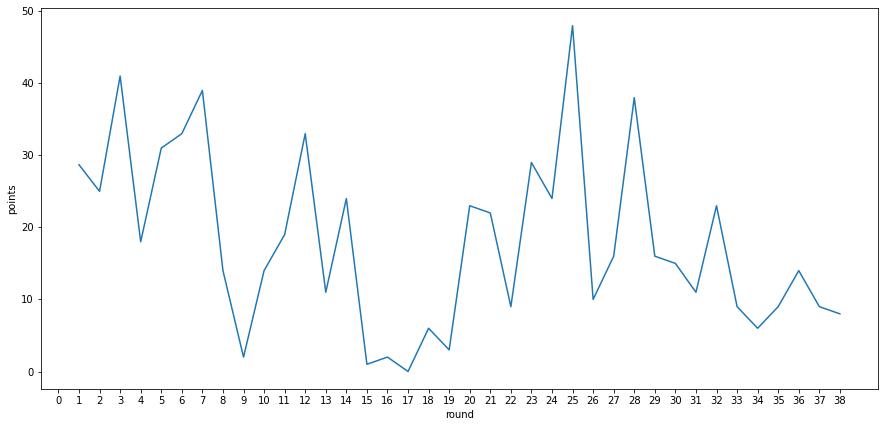

In [53]:
# df[df['player_name'] == 'Mohamed Salah'].plot(x='round', y='total_points')
_ = plt.figure(figsize=(15,7))
df[df['player_name'] == 'Sergio Agüero'].groupby('round').sum()['total_points'].plot()
_ = plt.xticks(np.arange(39))
_ = plt.ylabel('points')
plt.show()

In [51]:
# # df[df['player_name'] == 'Mohamed Salah'].plot(x='round', y='total_points')
# _ = plt.figure(figsize=(15,7))
# df[df['player_name'] == 'Mohamed Salah'].groupby('round').sum()['creativity'].plot()
# _ = plt.xticks(np.arange(39))
# _ = plt.ylabel('creativity')
# plt.show()

In [52]:
# # df[df['player_name'] == 'Mohamed Salah'].plot(x='round', y='total_points')
# _ = plt.figure(figsize=(15,7))
# df[df['player_name'] == 'Mohamed Salah'].groupby('round').sum()['total_points'].plot()
# _ = plt.xticks(np.arange(39))
# _ = plt.ylabel('points')
# plt.show()

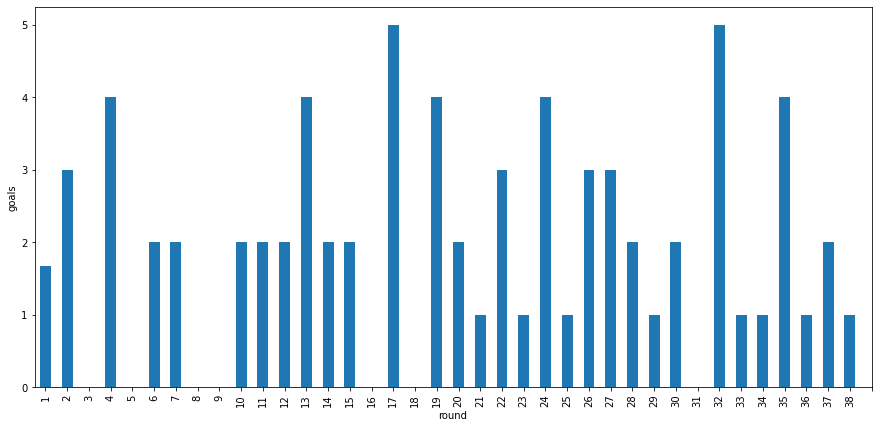

In [42]:
# df[df['player_name'] == 'Mohamed Salah'].plot(x='round', y='total_points')
_ = plt.figure(figsize=(15,7))
df[df['player_name'] == 'Mohamed Salah'].groupby('round').sum()['goals_scored'].plot(kind='bar')
_ = plt.xticks(np.arange(39))
_ = plt.ylabel('goals')
plt.show()

## Top Ten Teams for total points

<AxesSubplot:xlabel='player_team'>

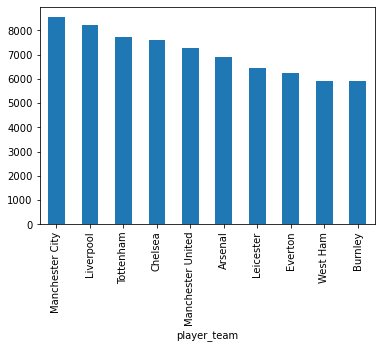

In [30]:
df.groupby('player_team').sum()['total_points'].sort_values(ascending=False)[0:10].plot(kind='bar')

## Top Ten Players for total points

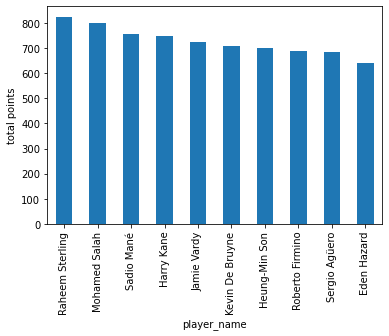

In [32]:
df.groupby('player_name').sum()['total_points'].sort_values(ascending=False)[0:10].plot(kind='bar')
_ = plt.ylabel('total points')

## Top Ten Teams for Goals

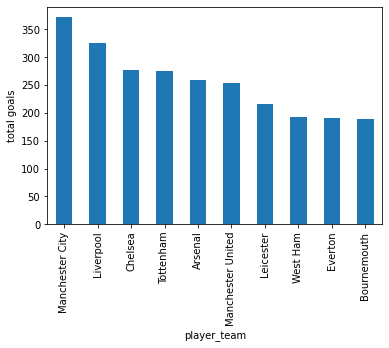

In [36]:
df.groupby('player_team').sum()['goals_scored'].sort_values(ascending=False)[0:10].plot(kind='bar')
_ = plt.ylabel('total goals')

## Top Ten Players for Goals

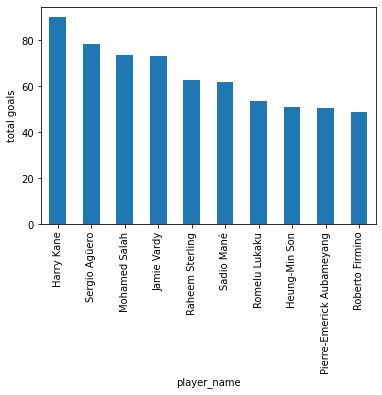

In [37]:
df.groupby('player_name').sum()['goals_scored'].sort_values(ascending=False)[0:10].plot(kind='bar')
_ = plt.ylabel('total goals')

## Top Ten Players for Assists

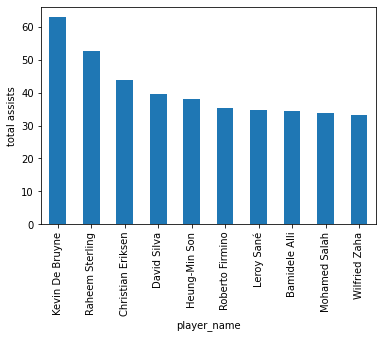

In [38]:
df.groupby('player_name').sum()['assists'].sort_values(ascending=False)[0:10].plot(kind='bar')
_ = plt.ylabel('total assists')

## Relations between variables